In [63]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
object_categories = ['aeroplane', 'bicycle', 'bird', 'boat',
                     'bottle', 'bus', 'car', 'cat', 'chair',
                     'cow', 'diningtable', 'dog', 'horse',
                     'motorbike', 'person', 'pottedplant',
                     'sheep', 'sofa', 'train', 'tvmonitor']

sns.set(font_scale=1.5, rc={'text.usetex' : True})

In [85]:
def coef_p(x, m):
    return m * np.exp(-m * x)

def sigmoid(x):
    return 1./(1. + np.exp(-x))

In [86]:
xs = np.linspace(-100, 100, 100)   

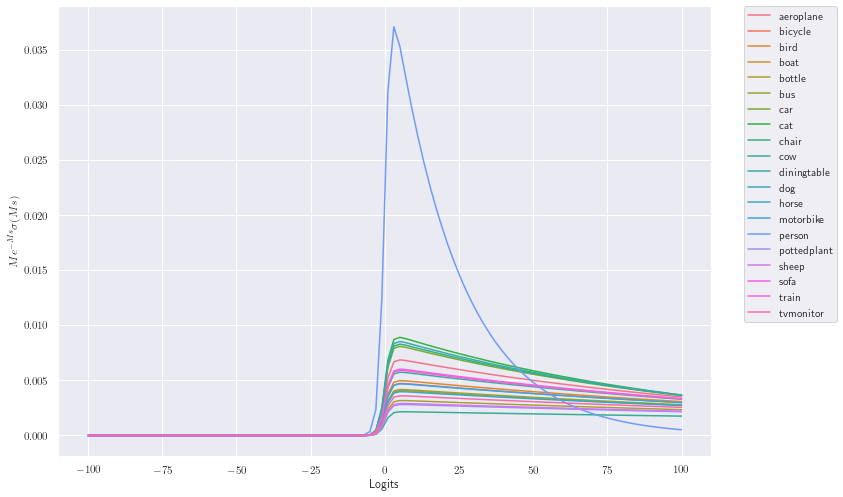

In [89]:
global_cam = np.load('../global_cam.npy')

global_vec = np.mean(global_cam, axis=(1,2))
# global_vec = global_vec / np.sum(global_vec)

d = {}
d['Logits'] = xs

ys = []
for idx, m in enumerate(global_vec):
    d[object_categories[idx]] = coef_p(xs, m) * sigmoid(xs)

df = pd.DataFrame(data=d)
dfm = df.melt('Logits', var_name='Class', value_name='$Me^{-Ms}\sigma(Ms)$')

sns.lineplot(data=dfm, x="Logits", y="$Me^{-Ms}\sigma(Ms)$",
    hue="Class"
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

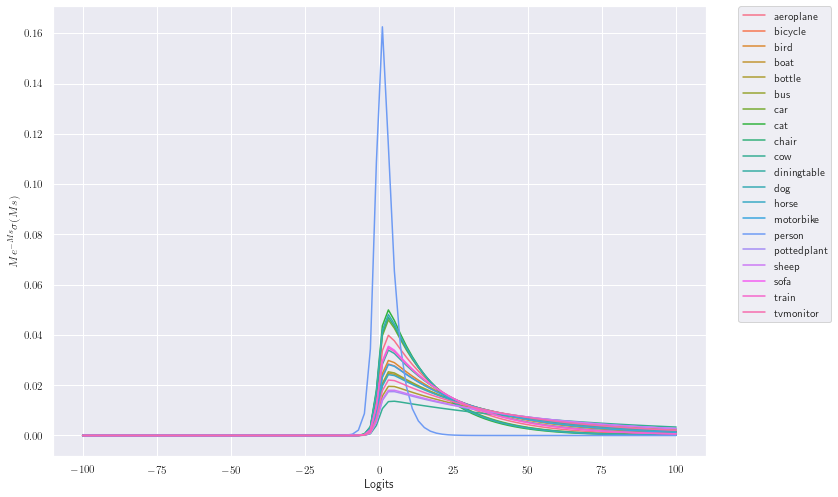

In [90]:
global_cam = np.load('../global_cam.npy')

global_vec = np.mean(global_cam, axis=(1,2))
global_vec = global_vec / np.sum(global_vec)

d = {}
d['Logits'] = xs

ys = []
for idx, m in enumerate(global_vec):
    d[object_categories[idx]] = coef_p(xs, m) * sigmoid(xs)

df = pd.DataFrame(data=d)
dfm = df.melt('Logits', var_name='Class', value_name='$Me^{-Ms}\sigma(Ms)$')

sns.lineplot(data=dfm, x="Logits", y="$Me^{-Ms}\sigma(Ms)$",
    hue="Class"
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)